# *Using regression techniques—including linear regression, ridge and lasso regularization, decision tree regression, ensemble methods (e.g., random forest), Support Vector Regression (SVR) and KNN.*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
url = 'https://drive.google.com/uc?id=1Xkm84DEOHqZ6YNnNP3jzerpUPU6LoCyJ'
data = pd.read_csv(url)

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
None


In [ ]:
print(data.describe())

       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


In [ ]:
print(data.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [ ]:
data = data.dropna()

In [ ]:
data_encoded = data.copy()
label_encoders = {}

In [ ]:
for column in ['sex', 'smoker', 'day', 'time']:
    le = LabelEncoder()
    data_encoded[column] = le.fit_transform(data_encoded[column])
    label_encoders[column] = le

In [ ]:
data_encoded_for_corr = data.copy()
for column in ['sex', 'smoker', 'day', 'time']:
    data_encoded_for_corr[column] = label_encoders[column].transform(data[column])

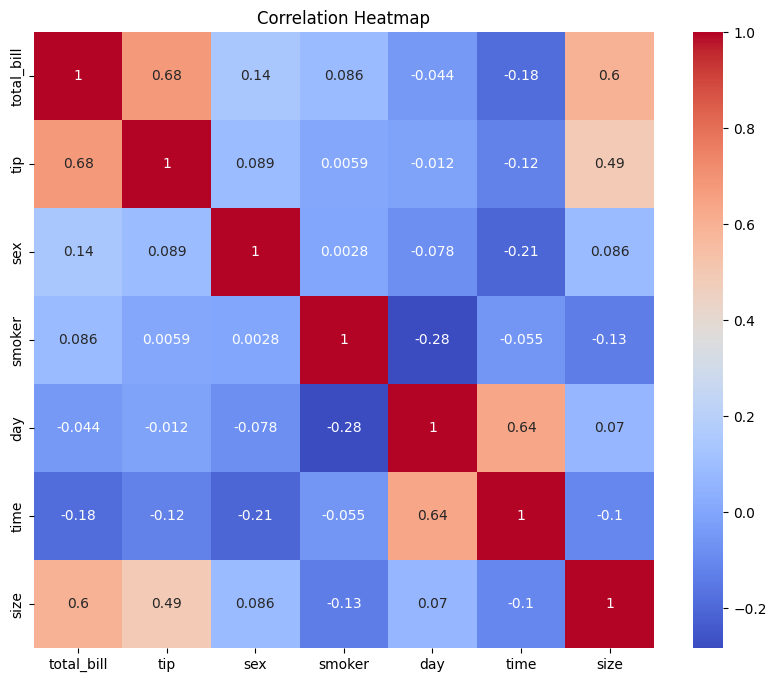

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(data_encoded_for_corr.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
X = data_encoded.drop(columns=['tip'])  # assuming 'tip' is the column with tip amounts
y = data_encoded['tip']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    results = {
        "Train MAE": mean_absolute_error(y_train, y_pred_train),
        "Test MAE": mean_absolute_error(y_test, y_pred_test),
        "Train MSE": mean_squared_error(y_train, y_pred_train),
        "Test MSE": mean_squared_error(y_test, y_pred_test),
        "Train R2": r2_score(y_train, y_pred_train),
        "Test R2": r2_score(y_test, y_pred_test),
    }
    return results

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Support Vector Regression": SVR(kernel='linear'),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5)
}

In [ ]:
results = {name: evaluate_model(model, X_train_scaled, y_train, X_test_scaled, y_test) for name, model in models.items()}

In [ ]:
results_df = pd.DataFrame(results).T
results_df.sort_values(by="Test R2", ascending=False, inplace=True)

In [ ]:
print("\nModel Performance Results:")
print(results_df)


Model Performance Results:
                           Train MAE  Test MAE  Train MSE  Test MSE  Train R2  \
Lasso Regression            0.777739  0.654809   1.126874  0.612209  0.445356   
Support Vector Regression   0.751863  0.671169   1.128344  0.688483  0.444633   
Ridge Regression            0.764077  0.670024   1.105440  0.693797  0.455906   
Linear Regression           0.763986  0.670381   1.105417  0.694813  0.455917   
K-Nearest Neighbors         0.689128  0.748571   0.929609  0.809422  0.542449   
Random Forest               0.310163  0.772902   0.177019  0.962104  0.912872   
Decision Tree               0.000000  0.922449   0.000000  1.413408  1.000000   

                            Test R2  
Lasso Regression           0.510221  
Support Vector Regression  0.449201  
Ridge Regression           0.444950  
Linear Regression          0.444137  
K-Nearest Neighbors        0.352448  
Random Forest              0.230299  
Decision Tree             -0.130752  


In [ ]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
importances = rf_reg.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance from Random Forest Model:")
print(feature_importance_df)


Feature Importance from Random Forest Model:
      Feature  Importance
0  total_bill    0.768877
2      smoker    0.070987
3         day    0.060513
5        size    0.059022
1         sex    0.026900
4        time    0.013701


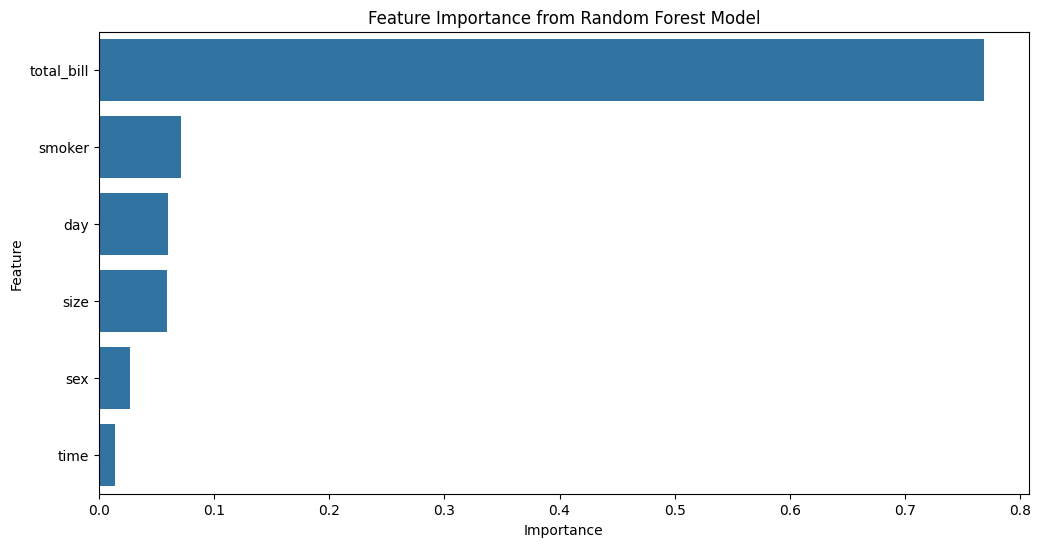

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest Model')
plt.show()

In [ ]:
important_features = feature_importance_df[feature_importance_df['Importance'] > 0.05]['Feature'].tolist()
print(f"Important features impacting tip amounts: {important_features}")
print("\nManagement Insights:")
for feature in important_features:
    print(f"Focus on {feature}: enhancing this aspect may lead to increased tips.")

Important features impacting tip amounts: ['total_bill', 'smoker', 'day', 'size']

Management Insights:
Focus on total_bill: enhancing this aspect may lead to increased tips.
Focus on smoker: enhancing this aspect may lead to increased tips.
Focus on day: enhancing this aspect may lead to increased tips.
Focus on size: enhancing this aspect may lead to increased tips.


# *Checking if the data follows a linear trend using following methods to analyze the relationship between the target variable and predictors.*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.api import OLS, add_constant
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.stats.diagnostic import linear_rainbow

In [ ]:
label_encoders = {}
for column in ['sex', 'smoker', 'day', 'time']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [ ]:
X = data.drop(columns=['tip'])
y = data['tip']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


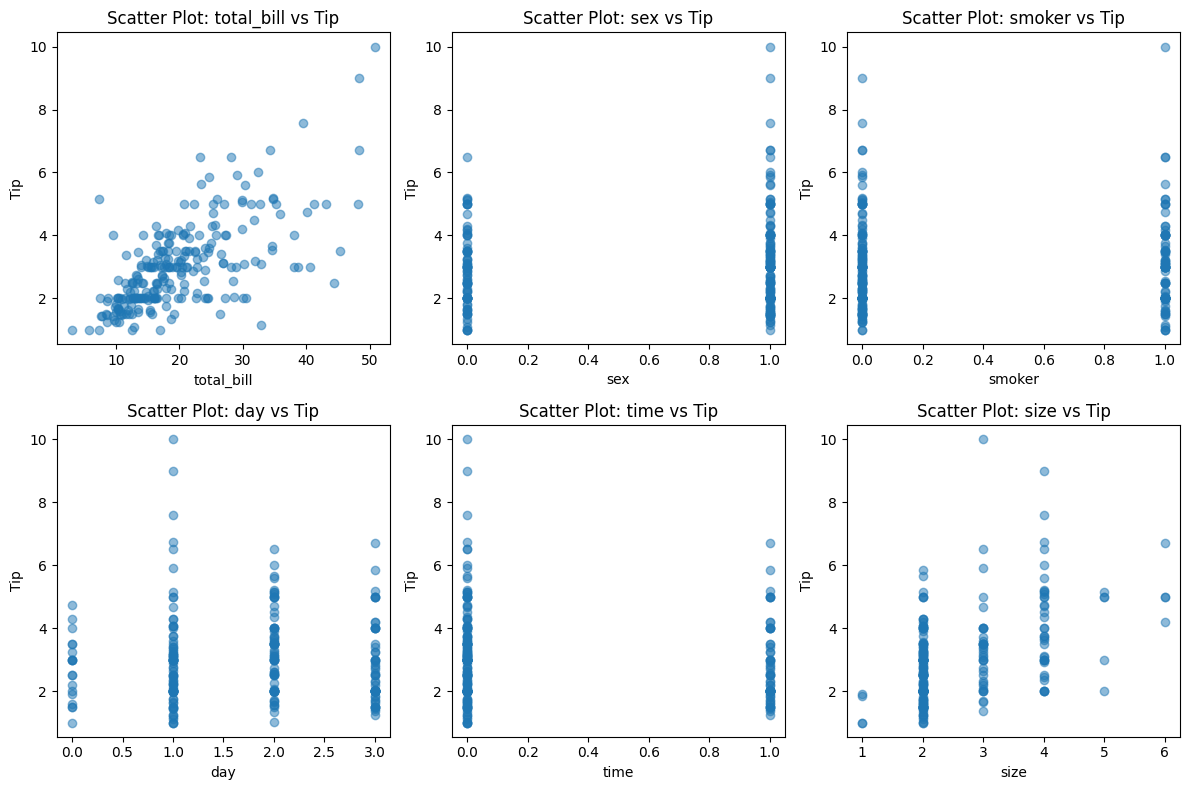

In [ ]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(X.columns, 1):
    plt.subplot(2, 3, i)
    plt.scatter(data[col], y, alpha=0.5)
    plt.title(f'Scatter Plot: {col} vs Tip')
    plt.xlabel(col)
    plt.ylabel('Tip')
plt.tight_layout()
plt.show()

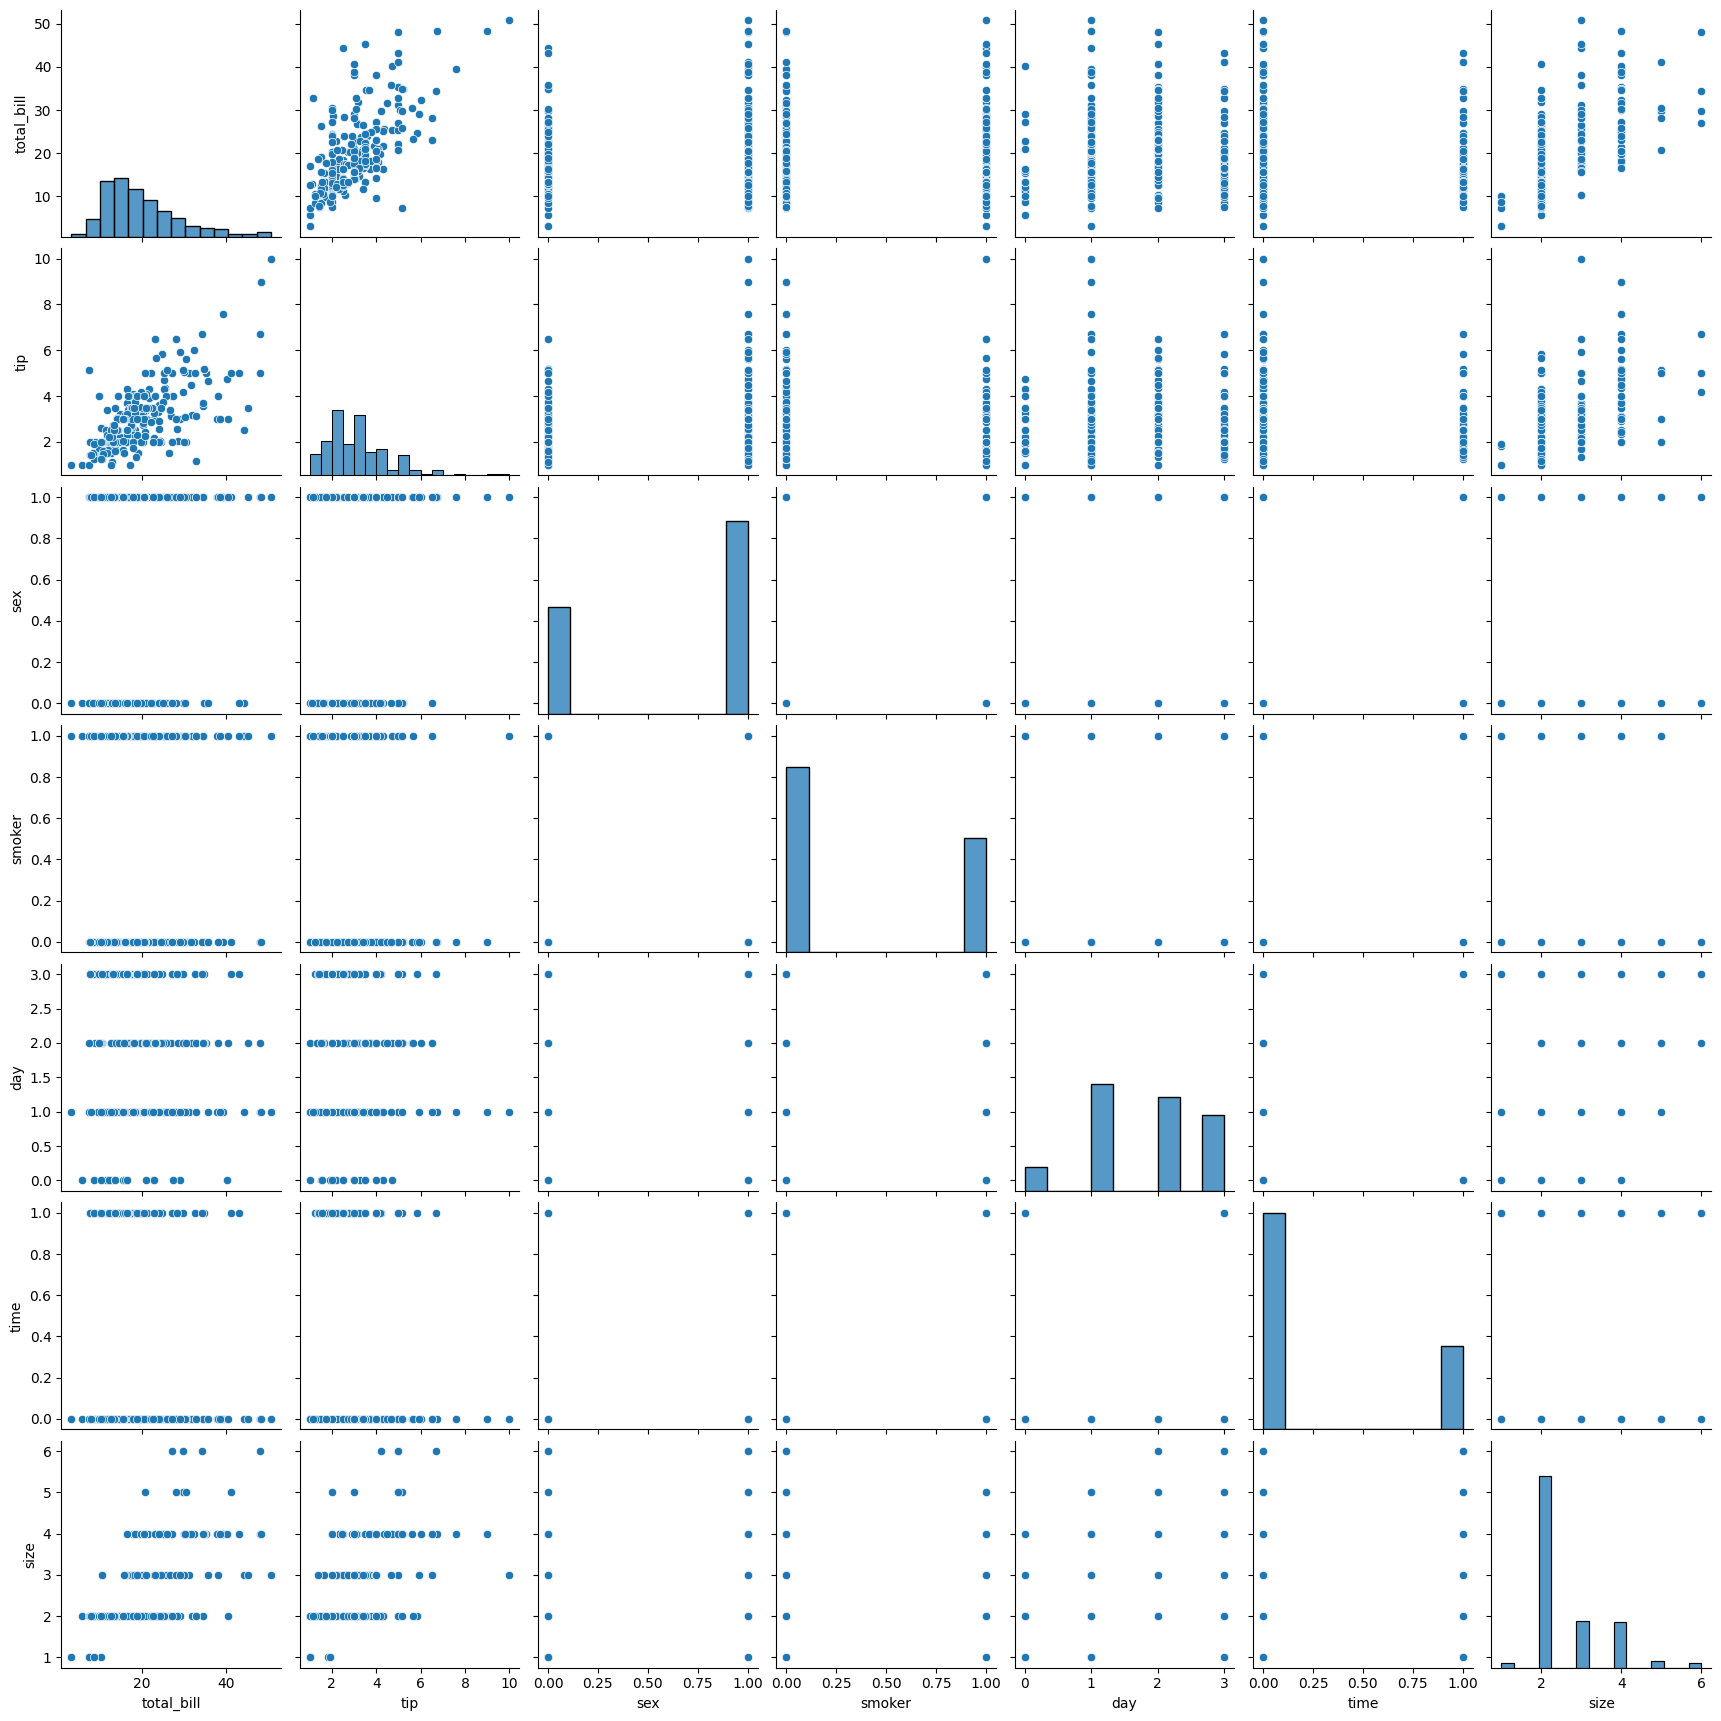

In [ ]:
sns.pairplot(data)
plt.show()

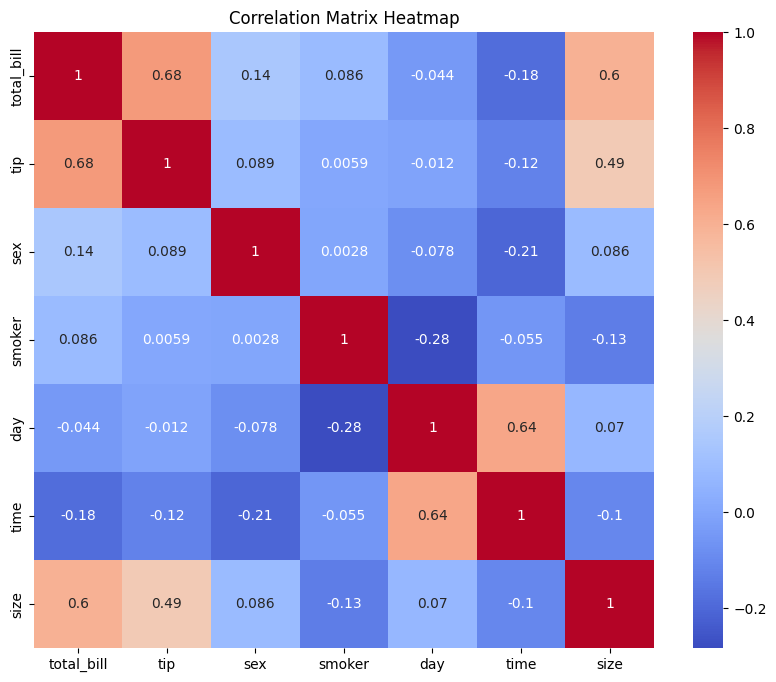

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()

In [ ]:
X_train_const = add_constant(X_train)
model = OLS(y_train, X_train_const).fit()
rainbow_stat, rainbow_p_val = linear_rainbow(model)
print("Rainbow Test Statistic:", rainbow_stat)
print("Rainbow Test p-value:", rainbow_p_val)
if rainbow_p_val > 0.05:
    print("The relationship is likely linear (fail to reject null hypothesis).")
else:
    print("The relationship may not be linear (reject null hypothesis).")

Rainbow Test Statistic: 1.594118024132203
Rainbow Test p-value: 0.012798910686288717
The relationship may not be linear (reject null hypothesis).


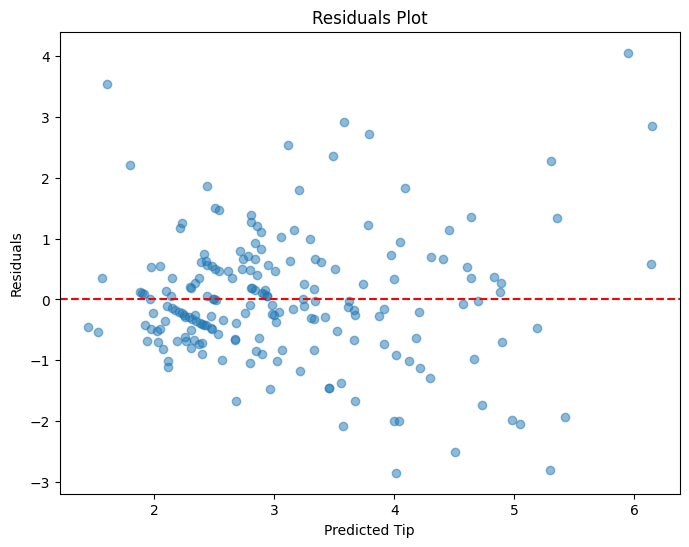

In [ ]:
y_train_pred = model.predict(X_train_const)
residuals = y_train - y_train_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_train_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Tip")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.show()

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

In [ ]:
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    results[name] = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "R2 Score": r2_score(y_test, y_pred)
    }

In [ ]:
results_df = pd.DataFrame(results).T
print("\nModel Evaluation Results:")
print(results_df)


Model Evaluation Results:
                        MAE       MSE  R2 Score
Linear Regression  0.670381  0.694813  0.444137
Ridge Regression   0.670024  0.693797  0.444950
Lasso Regression   0.654809  0.612209  0.510221
Random Forest      0.772902  0.962104  0.230299


In [ ]:
best_model = results_df['R2 Score'].idxmax()
print(f"\nBest model based on R2 Score: {best_model}")


Best model based on R2 Score: Lasso Regression


Scatter Plot: Shows the relationship between each feature and the target variable.

Pair Plot: Visualizes relationships between all pairs of features.

Correlation Heatmap: Shows correlation coefficients, indicating possible linear associations.

Rainbow Test for Linearity: Uses a statistical test to determine if the relationship is likely linear.

Residual Plot: Examines residuals to assess if a linear model fits well.

Model Selection: Tests both linear and non-linear regression models, comparing performance using R² score.